<a href="https://colab.research.google.com/github/ukishore33/Building-Machine-Learning-Pipeline-on-Startup-Acquisition/blob/main/Startup_Data_Analysis_task_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction



In the world of startups and venture capital, understanding the financial conditions of companies and their fundraising goals is of paramount importance. This project aims to shed light on this complex landscape by leveraging a supervised machine learning approach. We will delve into a dataset filled with industry trends, investment insights, and individual company information to predict the fate of startups: whether they will continue operating, go public (IPO), get acquired, or close their doors.



## Importance of Start - up Data Acquisition prediction using Machine learning algorithms:


Predicting Big Mart sales using machine learning algorithms carries significant importance for both the retail industry and the business itself. Here are some key reasons why sales prediction is crucial:
1. Optimized Inventory Management
2. Minimized Costs
3. Enhanced Customer Satisfaction
4. Effective Marketing Strategies
5. Resource Allocation
6. Seasonal and Trend Analysis
7. Seasonal and Trend Analysis
8. Supply Chain Efficiency
9. Financial Planning
10. Competitive Advantage
11. Personalized Customer Experience
12. Operational Efficiency

## Problem Statement


The central problem addressed in this project is the prediction of a startup's future trajectory. By utilizing historical data on startups that have been acquired or have closed down, we aim to build a predictive model that can anticipate the fate of existing startups. This model will be a valuable tool for investors, entrepreneurs, and stakeholders in the startup ecosystem to make informed decisions.





## Hypothesis Generation

Financial Metrics: Startups with healthier financial metrics, such as higher revenue and lower expenses, are more likely to continue operating or go public.
Industry Trends: Certain industries may be more prone to acquisitions, while others may have a higher rate of startup closures.
Investment History: Startups that have received substantial funding in previous rounds are more likely to get acquired or go public.
Geographical Influence: The location of a startup may play a role in its fate, with startups in tech hubs possibly having different outcomes compared to those in other regions.



## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Understanding of Data


The dataset provided is extensive, containing 44 columns with various types of information. It includes details about company names, their industries, funding history, geographical locations, and much more. Some columns are dedicated to describing the data itself, such as entity ID and normalized names, which will not be used for model training.



In [3]:
company = pd.read_csv("/content/drive/MyDrive/Data Science Projects/Violavizn/companies.csv")
company

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN


In [4]:
company.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [5]:
company.tail()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
196548,c:99940,196548,Company,99940,NaN,Webgility,webgility,/company/webgility,ecommerce,operating,...,2013-08-12,2013-08-12,2.0,5.0,NaN,2011-09-06 23:17:56,2013-08-13 00:39:13,37.774929,-122.419415,NaN
196549,c:9995,196549,Company,9995,NaN,FohBoh,fohboh,/company/fohboh,public_relations,operating,...,2013-05-01,2013-05-01,1.0,14.0,NaN,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,NaN
196550,c:9996,196550,Company,9996,NaN,CSC,csc,/company/csc,consulting,operating,...,2012-01-01,2013-10-30,3.0,44.0,NaN,2008-08-24 15:46:58,2013-06-28 20:52:01,38.882334,-77.171091,NaN
196551,c:9997,196551,Company,9997,NaN,Top-candidate,top candidate,/company/top-candidate,search,operating,...,NaN,NaN,NaN,1.0,NaN,2008-08-24 16:00:22,2013-06-28 20:56:44,34.052234,-118.243685,NaN
196552,c:9998,196552,Company,9998,NaN,Closet Couture,closet couture,/company/closet-couture,ecommerce,operating,...,2006-07-01,2008-09-10,2.0,1.0,NaN,2008-08-24 16:46:13,2013-03-23 12:01:50,34.035633,-118.515590,NaN


In [6]:
company.shape

(196553, 44)

In [7]:
company.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [8]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [9]:
company.nunique()

id                     196553
Unnamed: 0.1           196553
entity_type                 1
entity_id              196553
parent_id                   0
name                   196348
normalized_name        195451
permalink              196512
category_code              42
status                      4
founded_at               6156
closed_at                 925
domain                 125498
homepage_url           125961
twitter_username        79571
logo_url               110110
logo_width               3325
logo_height              2128
short_description        7126
description             83696
overview               126515
tag_list                79133
country_code              175
state_code                 51
city                    10652
region                   5847
first_investment_at      1197
last_investment_at       1105
investment_rounds          41
invested_companies         37
first_funding_at         3208
last_funding_at          2978
funding_rounds             15
funding_to

In [10]:
company.isnull().sum()

id                          0
Unnamed: 0.1                0
entity_type                 0
entity_id                   0
parent_id              196553
name                       22
normalized_name            26
permalink                   0
category_code           73367
status                      0
founded_at             105326
closed_at              193933
domain                  70008
homepage_url            70008
twitter_username       115962
logo_url                86443
logo_width              86443
logo_height             86443
short_description      189422
description            104505
overview                69582
tag_list               115101
country_code           108563
state_code             145650
city                   112663
region                      0
first_investment_at    193970
last_investment_at     193970
investment_rounds      193962
invested_companies     193962
first_funding_at       165046
last_funding_at        165046
funding_rounds         164846
funding_to

In [11]:
# null values percentage
percentage = []
for i in company:
    per= (company[i].isnull().sum()/company.shape[0]) * 100
    percentage.append({"Variable":i,"Percentage":per})

per_null = pd.DataFrame(percentage)
print(per_null)

               Variable  Percentage
0                    id    0.000000
1          Unnamed: 0.1    0.000000
2           entity_type    0.000000
3             entity_id    0.000000
4             parent_id  100.000000
5                  name    0.011193
6       normalized_name    0.013228
7             permalink    0.000000
8         category_code   37.326828
9                status    0.000000
10           founded_at   53.586564
11            closed_at   98.667026
12               domain   35.617874
13         homepage_url   35.617874
14     twitter_username   58.997828
15             logo_url   43.979486
16           logo_width   43.979486
17          logo_height   43.979486
18    short_description   96.371971
19          description   53.168865
20             overview   35.401139
21             tag_list   58.559778
22         country_code   55.233448
23           state_code   74.102151
24                 city   57.319400
25               region    0.000000
26  first_investment_at   98

In [12]:
# Condition 1: percentage < 20
condition_1 = per_null["Percentage"] < 20
filtered_rows_1 = per_null[condition_1]
print("Percentage < 20:")
print(filtered_rows_1)
print("-"*35)

# Condition 2: 20 <= Percentage < 60
condition_2 = (per_null["Percentage"] >= 20) & (per_null["Percentage"] < 90)
filtered_rows_2 = per_null[condition_2]
print("20 <= Percentage < 60:")
print(filtered_rows_2)
print("-"*35)

# Condition 3: Percentage >= 60
condition_3 = per_null["Percentage"] >= 90
filtered_rows_3 = per_null[condition_3]
print("Percentage >= 60:")
print(filtered_rows_3)

Percentage < 20:
           Variable  Percentage
0                id    0.000000
1      Unnamed: 0.1    0.000000
2       entity_type    0.000000
3         entity_id    0.000000
5              name    0.011193
6   normalized_name    0.013228
7         permalink    0.000000
9            status    0.000000
25           region    0.000000
39       created_at    0.000000
40       updated_at    0.000000
-----------------------------------
20 <= Percentage < 60:
              Variable  Percentage
8        category_code   37.326828
10          founded_at   53.586564
12              domain   35.617874
13        homepage_url   35.617874
14    twitter_username   58.997828
15            logo_url   43.979486
16          logo_width   43.979486
17         logo_height   43.979486
19         description   53.168865
20            overview   35.401139
21            tag_list   58.559778
22        country_code   55.233448
23          state_code   74.102151
24                city   57.319400
30    first_fun

In [13]:
company.duplicated().sum()

0

In [14]:
company.duplicated().any()

False

There is no duplicates in this dataset.

In [15]:
# getting categorical and numerical columns
categorical_cols = company.select_dtypes(exclude='number').columns.to_list()
numerical_cols = company.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', categorical_cols)
print('Numerical Columns: ', numerical_cols)

Categorical Columns:  ['id', 'entity_type', 'name', 'normalized_name', 'permalink', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'short_description', 'description', 'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at', 'created_by', 'created_at', 'updated_at']
Numerical Columns:  ['Unnamed: 0.1', 'entity_id', 'parent_id', 'logo_width', 'logo_height', 'investment_rounds', 'invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'lat', 'lng', 'ROI']


In [16]:
# exploring categories
for i in company:
    print('-----------------------------')
    print('Series: ', i)
    print('-----------------------------')
    print(company[i].value_counts())
    print('\n')

-----------------------------
Series:  id
-----------------------------
c:1         1
c:275321    1
c:275313    1
c:275314    1
c:275315    1
           ..
c:209430    1
c:209431    1
c:209432    1
c:209433    1
c:9998      1
Name: id, Length: 196553, dtype: int64


-----------------------------
Series:  Unnamed: 0.1
-----------------------------
0         1
131039    1
131030    1
131031    1
131032    1
         ..
65520     1
65521     1
65522     1
65523     1
196552    1
Name: Unnamed: 0.1, Length: 196553, dtype: int64


-----------------------------
Series:  entity_type
-----------------------------
Company    196553
Name: entity_type, dtype: int64


-----------------------------
Series:  entity_id
-----------------------------
1         1
275321    1
275313    1
275314    1
275315    1
         ..
209430    1
209431    1
209432    1
209433    1
9998      1
Name: entity_id, Length: 196553, dtype: int64


-----------------------------
Series:  parent_id
---------------------------

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [17]:
company.drop(["city","region"], inplace=True, axis=1)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [18]:
company.drop(["id","Unnamed: 0.1","entity_type","entity_id","parent_id","created_by","created_at","updated_at"], inplace=True, axis=1)

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [19]:
company.drop(["domain","homepage_url","twitter_username","logo_url","logo_width","logo_height","short_description",
         "description","overview","tag_list",'name', 'normalized_name', 'permalink', 'invested_companies' ], inplace=True, axis=1)

#### 1.d. Delete duplicate values if found any.

In [20]:
company.shape

(196553, 20)

In [21]:
# Delete duplicate values if found any.
company.duplicated().sum()

86929

In [22]:

# Use the 'duplicated' method to identify duplicate rows
duplicates = company[company.duplicated()]

# Count the number of duplicate rows
num_duplicates = len(duplicates)

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 86929


In [23]:
# Delete duplicate values if found any.
company.duplicated().any()

True

In [24]:
# Since, there are duplicate values in the dataset let's see how of duplicate values are present.
company.duplicated().sum()

86929

In [25]:
# Let's delete all the duplicate values
company.drop_duplicates(inplace=True)

In [26]:
# check if any left
company.duplicated().any()

False

#### 1.e. Delete those which has more than 98% of null values.

In [27]:
company

,category_code,status,founded_at,closed_at,country_code,state_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,WA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,CA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [28]:
# # Since we can see only nan values so let's check how much of rows has nan values.
company.isnull().sum()

category_code           12259
status                      0
founded_at              27042
closed_at              107005
country_code            24870
state_code              60325
first_investment_at    107377
last_investment_at     107377
investment_rounds      107373
first_funding_at        78152
last_funding_at         78152
funding_rounds          77953
funding_total_usd       81762
first_milestone_at      53508
last_milestone_at       53508
milestones              53508
relationships           34515
lat                     28451
lng                     28451
ROI                    108898
dtype: int64

In [29]:
# Condition 3: Percentage >= 96
condition = per_null["Percentage"] >= 96
filtered_rows = per_null[condition]
print("Percentage >= 96:")
print(filtered_rows)

Percentage >= 96:
               Variable  Percentage
4             parent_id  100.000000
11            closed_at   98.667026
18    short_description   96.371971
26  first_investment_at   98.685851
27   last_investment_at   98.685851
28    investment_rounds   98.681780
29   invested_companies   98.681780
43                  ROI   99.630634


In [30]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company.drop(['first_investment_at','last_investment_at','investment_rounds','ROI'], inplace=True, axis=1)

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [31]:
company.dtypes

category_code          object
status                 object
founded_at             object
closed_at              object
country_code           object
state_code             object
first_funding_at       object
last_funding_at        object
funding_rounds        float64
funding_total_usd     float64
first_milestone_at     object
last_milestone_at      object
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

In [32]:
#Type your code here!
columns_to_check = ['status', 'country_code', 'category_code', 'founded_at']
company.dropna(subset=columns_to_check, inplace=True)

In [33]:
# Since we can see only nan values so let's check how much of rows has nan values.
company.isnull().sum()

category_code             0
status                    0
founded_at                0
closed_at             61955
country_code              0
state_code            27231
first_funding_at      40867
last_funding_at       40867
funding_rounds        40727
funding_total_usd     43149
first_milestone_at    28367
last_milestone_at     28367
milestones            28367
relationships         15310
lat                    2397
lng                    2397
dtype: int64

In [34]:
#Type your code here!

In [35]:
company.shape

(63616, 16)

In [36]:
company

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,WA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NM,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,CA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,CA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,CA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,VA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

In [37]:
cols_for_boxplot=[ 'funding_total_usd','funding_rounds']

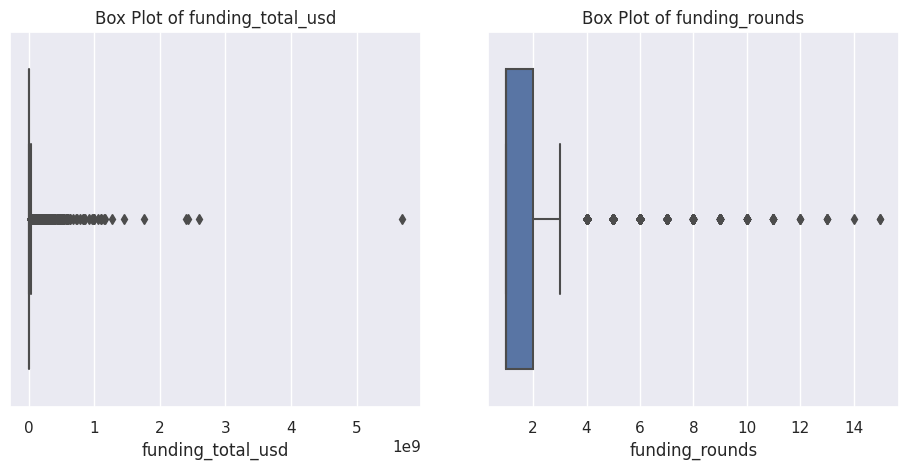

In [38]:
#Type your code here!
plt.figure(figsize=[15, 30])
for idx,column in enumerate(cols_for_boxplot,start=1):
  plt.subplot(6,3,idx)
  sns.boxplot(x=company[column])
  plt.xlabel(f'{column}')
  plt.title(f'Box Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming


#### 2.b.1. Find the IQR

In [39]:
# For 'funding_total_usd'
Q1_tu = company['funding_total_usd'].quantile(0.25)
Q3_tu = company['funding_total_usd'].quantile(0.75)
IQR_tu = Q3_tu - Q1_tu

# For 'funding_rounds'
Q1_r = company['funding_rounds'].quantile(0.25)
Q3_r = company['funding_rounds'].quantile(0.75)
IQR_r = Q3_r - Q1_r

#### 2.b.1. Find the Upper and Lower limit

In [40]:
# For funding_total_usd
lower_bound_tu= Q1_tu - 1.5 * IQR_tu
upper_bound_tu = Q3_tu + 1.5 * IQR_tu
# For funding_rounds
lower_bound_r= Q1_r - 1.5 * IQR_r
upper_bound_r = Q3_r + 1.5 * IQR_r

#### 2.b.1.  Find outliers

In [41]:
# For funding_total_usd
outliers_tu = (company['funding_total_usd'] < lower_bound_tu) | (company['funding_total_usd'] > upper_bound_tu)
# For funding_rounds
outliers_r = (company['funding_rounds'] < lower_bound_r) | (company['funding_rounds'] > upper_bound_r)

#### 2.b.1. Drop the outliers

In [42]:
# For funding_total_usd
#Type your code here!
company = company[~outliers_tu]
# For funding_rounds
#Type your code here!
company = company[~outliers_r]

In [43]:
company

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007-06-27,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008-08-20,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008-08-01,NaN,USA,NM,NaN,NaN,NaN,NaN,2008-08-22,2008-08-22,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007-10-01,NaN,USA,CA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008-01-01,NaN,USA,CA,NaN,NaN,NaN,NaN,2008-01-01,2008-01-01,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,CA,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007-11-01,NaN,USA,CA,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959-01-01,NaN,USA,VA,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008-07-01,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [44]:
company.shape

(60018, 16)

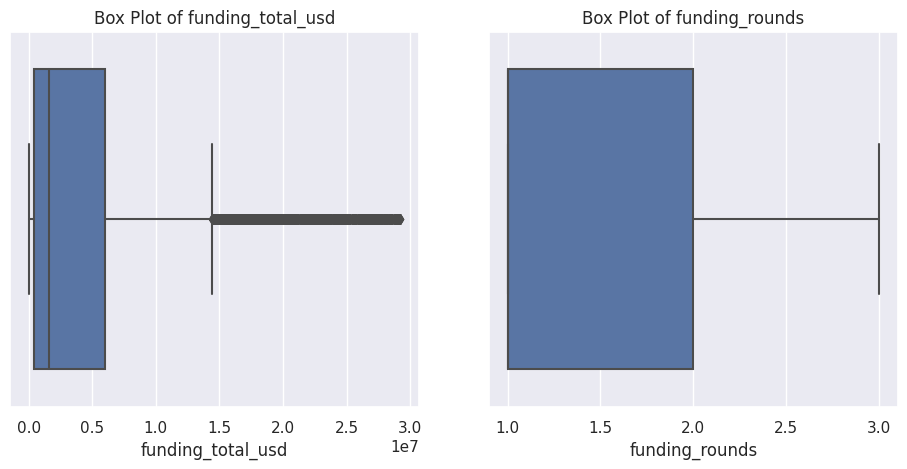

In [45]:
#Type your code here!
plt.figure(figsize=[15, 30])
for idx,column in enumerate(cols_for_boxplot,start=1):
  plt.subplot(6,3,idx)
  sns.boxplot(x=company[column])
  plt.xlabel(f'{column}')
  plt.title(f'Box Plot of {column}')
  plt.tight_layout(pad=4)
plt.show()

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [46]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

In [47]:
company.dtypes

category_code          object
status                 object
founded_at             object
closed_at              object
country_code           object
state_code             object
first_funding_at       object
last_funding_at        object
funding_rounds        float64
funding_total_usd     float64
first_milestone_at     object
last_milestone_at      object
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [48]:
# For founded_at
company['founded_at'] = pd.to_datetime(company['founded_at'])
company['founded_at'] = company['founded_at'].dt.year

# closed_at
company['closed_at'] = pd.to_datetime(company['closed_at'])
company['closed_at'] = company['closed_at'].dt.year

# # first_funding_at
company['first_funding_at'] = pd.to_datetime(company['first_funding_at'])
company['first_funding_at'] = company['first_funding_at'].dt.year

# # last_funding_at
company['last_funding_at'] = pd.to_datetime(company['last_funding_at'])
company['last_funding_at'] = company['last_funding_at'].dt.year

# # first_milestone_at
company['first_milestone_at'] = pd.to_datetime(company['first_milestone_at'])
company['first_milestone_at'] = company['first_milestone_at'].dt.year

# # last_milestone_at
company['last_milestone_at'] = pd.to_datetime(company['last_milestone_at'])
company['last_milestone_at'] = company['last_milestone_at'].dt.year

company

,category_code,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
5,advertising,operating,2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,30.427755,-9.598107
6,cleantech,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.307159,73.181219
12,advertising,operating,2008,NaN,USA,NM,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,2.0,35.686975,-105.937799
13,web,acquired,2007,NaN,USA,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,37.386052,-122.083851
15,games_video,operating,2008,NaN,USA,CA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,3.0,33.078655,-116.601964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,NaN,USA,CA,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007,NaN,USA,CA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,NaN,USA,VA,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685


In [49]:
company.nunique()

category_code           42
status                   4
founded_at             114
closed_at               16
country_code           165
state_code              51
first_funding_at        28
last_funding_at         28
funding_rounds           3
funding_total_usd     5366
first_milestone_at      50
last_milestone_at       50
milestones               7
relationships          126
lat                   6378
lng                   6372
dtype: int64

 #### 1.b. Generalize the categorical data i.e. category_code and  country_code

In [50]:
# 1. category_code
company['category_code'].nunique()

42

In [51]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name
# remaining one as other.

value_counts_sorted = company['category_code'].value_counts(ascending=False)
value_counts_sorted

software            10895
web                  7763
ecommerce            4833
other                4703
mobile               3700
advertising          3577
games_video          2790
consulting           2782
enterprise           2472
biotech              2006
public_relations     1561
hardware             1434
network_hosting      1255
education            1149
search                976
cleantech             798
social                646
analytics             646
finance               638
security              612
health                601
legal                 362
medical               361
semiconductor         360
travel                330
news                  282
manufacturing         276
fashion               271
hospitality           267
real_estate           220
local                 197
photo_video           196
messaging             180
music                 179
sports                165
transportation        126
nonprofit             114
design                107
automotive  

In [52]:
# Lets keep the category as same of it falls under above 10 otherwise let's replace it with other.
# List of categories to replace with 'other'
categories_to_replace = ['cleantech','social', 'analytics', 'finance', 'security', 'health', 'legal', 'medical', 'semiconductor', 'travel', 'news', 'manufacturing', 'fashion', 'hospitality', 'real_estate', 'local', 'photo_video', 'messaging', 'music', 'sports', 'transportation', 'nonprofit', 'design', 'automotive', 'pets', 'nanotech', 'government']

# Replace specified categories with 'other'
company['category_code'].replace(categories_to_replace, 'other', inplace=True)

# Now, the specified categories have been replaced with 'other' in the 'category_code' column


In [53]:
value_counts_sorted = company['category_code'].value_counts(ascending=False)
value_counts_sorted

other               12825
software            10895
web                  7763
ecommerce            4833
mobile               3700
advertising          3577
games_video          2790
consulting           2782
enterprise           2472
biotech              2006
public_relations     1561
hardware             1434
network_hosting      1255
education            1149
search                976
Name: category_code, dtype: int64

In [54]:
# Let's check if we've more than 15 columns
len(company.columns)

16

In [55]:
# One-hot encoding to category_code
category_encoded = pd.get_dummies(company, columns=['category_code'], prefix=['category_code'])
category_encoded

,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,operating,2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
12,operating,2008,NaN,USA,NM,NaN,NaN,NaN,NaN,2008.0,...,0,0,0,0,0,0,0,0,0,0
13,acquired,2007,NaN,USA,CA,2008.0,2008.0,1.0,5000000.0,2008.0,...,0,0,0,0,0,0,0,0,0,1
15,operating,2008,NaN,USA,CA,NaN,NaN,NaN,NaN,2008.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,USA,CA,NaN,NaN,NaN,NaN,2013.0,...,0,0,0,0,0,0,0,0,0,0
196549,operating,2007,NaN,USA,CA,2008.0,2008.0,1.0,750000.0,2013.0,...,0,0,0,0,0,0,1,0,0,0
196550,operating,1959,NaN,USA,VA,NaN,NaN,NaN,NaN,2012.0,...,0,0,0,0,0,0,0,0,0,0
196551,operating,2008,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [56]:
# Concatenate category with company dataset
company=category_encoded.copy()
company

,status,founded_at,closed_at,country_code,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,...,category_code_enterprise,category_code_games_video,category_code_hardware,category_code_mobile,category_code_network_hosting,category_code_other,category_code_public_relations,category_code_search,category_code_software,category_code_web
5,operating,2007,NaN,MAR,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,operating,2008,NaN,IND,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
12,operating,2008,NaN,USA,NM,NaN,NaN,NaN,NaN,2008.0,...,0,0,0,0,0,0,0,0,0,0
13,acquired,2007,NaN,USA,CA,2008.0,2008.0,1.0,5000000.0,2008.0,...,0,0,0,0,0,0,0,0,0,1
15,operating,2008,NaN,USA,CA,NaN,NaN,NaN,NaN,2008.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,USA,CA,NaN,NaN,NaN,NaN,2013.0,...,0,0,0,0,0,0,0,0,0,0
196549,operating,2007,NaN,USA,CA,2008.0,2008.0,1.0,750000.0,2013.0,...,0,0,0,0,0,0,1,0,0,0
196550,operating,1959,NaN,USA,VA,NaN,NaN,NaN,NaN,2012.0,...,0,0,0,0,0,0,0,0,0,0
196551,operating,2008,NaN,USA,CA,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0


In [57]:
company.nunique()

status                               4
founded_at                         114
closed_at                           16
country_code                       165
state_code                          51
first_funding_at                    28
last_funding_at                     28
funding_rounds                       3
funding_total_usd                 5366
first_milestone_at                  50
last_milestone_at                   50
milestones                           7
relationships                      126
lat                               6378
lng                               6372
category_code_advertising            2
category_code_biotech                2
category_code_consulting             2
category_code_ecommerce              2
category_code_education              2
category_code_enterprise             2
category_code_games_video            2
category_code_hardware               2
category_code_mobile                 2
category_code_network_hosting        2
category_code_other      

In [58]:
# Since, We've added the encoded category_columns, let's delete original category_code
# company.drop(["category_code"], inplace=True, axis=1)

The Column 'category_code' is already deleted

### Let's encode 'country' column now.

In [59]:
# 1. country_code
company['country_code'].nunique()

165

In [60]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name
# remaining one as other.

value_counts_sorted = company['country_code'].value_counts(ascending=False).head(10)
value_counts_sorted


USA    33870
GBR     4959
IND     2987
CAN     2610
DEU     1358
FRA     1226
AUS     1027
ESP      880
ISR      764
NLD      653
Name: country_code, dtype: int64

In [61]:
# Create a mapping of values to 'other' for values not in the top 10
value_to_replace = {value: 'Other' for value in company['country_code'].unique() if value not in value_counts_sorted.index}

# Replace values not in the top 10 with 'other'
company['country_code'] = company['country_code'].replace(value_to_replace)


In [62]:
company['country_code'].value_counts(ascending=False)

USA      33870
Other     9684
GBR       4959
IND       2987
CAN       2610
DEU       1358
FRA       1226
AUS       1027
ESP        880
ISR        764
NLD        653
Name: country_code, dtype: int64

In [63]:
# One-hot encoding to category_code
country_encoded = pd.get_dummies(company, columns=['country_code'], prefix=['country_code'])
country_encoded

,status,founded_at,closed_at,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA
5,operating,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
6,operating,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
12,operating,2008,NaN,NM,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,0,1
13,acquired,2007,NaN,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,...,0,0,0,0,0,0,0,0,0,1
15,operating,2008,NaN,CA,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,CA,NaN,NaN,NaN,NaN,2013.0,2013.0,...,0,0,0,0,0,0,0,0,0,1
196549,operating,2007,NaN,CA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,...,0,0,0,0,0,0,0,0,0,1
196550,operating,1959,NaN,VA,NaN,NaN,NaN,NaN,2012.0,2013.0,...,0,0,0,0,0,0,0,0,0,1
196551,operating,2008,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1


In [93]:
# Concatenate category with company dataset
company=country_encoded.copy()

In [94]:
len(company.columns)

40

In [95]:
company.nunique()

status                               4
founded_at                         114
closed_at                           16
state_code                          51
first_funding_at                    28
last_funding_at                     28
funding_rounds                       3
funding_total_usd                 5366
first_milestone_at                  50
last_milestone_at                   50
milestones                           7
relationships                      126
lat                               6378
lng                               6372
category_code_advertising            2
category_code_biotech                2
category_code_consulting             2
category_code_ecommerce              2
category_code_education              2
category_code_enterprise             2
category_code_games_video            2
category_code_hardware               2
category_code_mobile                 2
category_code_network_hosting        2
category_code_other                  2
category_code_public_rela

In [96]:
# Since, We've added the encoded country_code , let's delete original category_code
# company.drop(["country_code"], inplace=True, axis=1)

country_code column is deleted

### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [97]:
company['status'].nunique()

4

In [98]:
company['status'].value_counts()

operating    54570
acquired      3488
closed        1518
ipo            442
Name: status, dtype: int64

In [99]:
company['isClosed'] = company['status'].apply(lambda x: 1 if x in ['operating', 'ipo'] else (0 if x in ['acquired', 'closed'] else x))

In [100]:
company

,status,founded_at,closed_at,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed
5,operating,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1
6,operating,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
12,operating,2008,NaN,NM,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,1,1
13,acquired,2007,NaN,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,...,0,0,0,0,0,0,0,0,1,0
15,operating,2008,NaN,CA,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,NaN,CA,NaN,NaN,NaN,NaN,2013.0,2013.0,...,0,0,0,0,0,0,0,0,1,1
196549,operating,2007,NaN,CA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,...,0,0,0,0,0,0,0,0,1,1
196550,operating,1959,NaN,VA,NaN,NaN,NaN,NaN,2012.0,2013.0,...,0,0,0,0,0,0,0,0,1,1
196551,operating,2008,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,1


#### 2.b. Create active_days
     i. Replacing values:
         -  if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
         - Where as if the value is 'acquired' or 'closed', let's put 0.
     ii. Subtract founded_date from closed_date, and calculate age in days (After calculating active days,
         check contradictory issues we didn't check it before).
     iii. Then, delete the closed_at column.

##### 2.b.i  Replacing the values in closed_at column
   - if the value in status is 'operating' or 'ipo' in closed_at, Let's put 2021.
   - Where as if the value is 'acquired' or 'closed', let's put 0.

In [101]:
company1=company.copy()


In [127]:
company=company1.copy()

In [130]:
# Define a mask for rows where 'status' is 'operating' or 'ipo'
mask1 = (company['status'] == 'operating') | (company['status'] == 'ipo')

# Define a mask for rows where 'status' is 'acquired' or 'closed'
mask2 = (company['status'] == 'acquired') | (company['status'] == 'closed')

# Use np.where to update the 'closed_at' column
company['closed_at'] = np.where(pd.notna(company['closed_at']), company['closed_at'],
                                np.where(mask1, '2021', np.where(mask2, '0', np.nan)).astype(int))

In [131]:
company['closed_at'].value_counts()

2021.0    55012
0.0        3462
2012.0      496
2013.0      389
2011.0      268
2010.0      177
2009.0      115
2008.0       68
2007.0       13
2006.0        6
2005.0        3
2001.0        2
2004.0        2
1963.0        1
1991.0        1
1998.0        1
1997.0        1
2000.0        1
Name: closed_at, dtype: int64

In [132]:
company['closed_at'].isnull().sum()

0

In [133]:
company

,status,founded_at,closed_at,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed
5,operating,2007,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,1
6,operating,2008,2021.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
12,operating,2008,2021.0,NM,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,1,1
13,acquired,2007,0.0,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,...,0,0,0,0,0,0,0,0,1,0
15,operating,2008,2021.0,CA,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,2021.0,CA,NaN,NaN,NaN,NaN,2013.0,2013.0,...,0,0,0,0,0,0,0,0,1,1
196549,operating,2007,2021.0,CA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,...,0,0,0,0,0,0,0,0,1,1
196550,operating,1959,2021.0,VA,NaN,NaN,NaN,NaN,2012.0,2013.0,...,0,0,0,0,0,0,0,0,1,1
196551,operating,2008,2021.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,1


In [134]:
company['closed_at'].nunique()

18

##### 2.b.ii Subtract founded_date from closed_date, and calculate age in days (After calculating active days, check contradictory issues we didn't check it before.)

In [135]:
company.dtypes

status                             object
founded_at                          int64
closed_at                         float64
state_code                         object
first_funding_at                  float64
last_funding_at                   float64
funding_rounds                    float64
funding_total_usd                 float64
first_milestone_at                float64
last_milestone_at                 float64
milestones                        float64
relationships                     float64
lat                               float64
lng                               float64
category_code_advertising           uint8
category_code_biotech               uint8
category_code_consulting            uint8
category_code_ecommerce             uint8
category_code_education             uint8
category_code_enterprise            uint8
category_code_games_video           uint8
category_code_hardware              uint8
category_code_mobile                uint8
category_code_network_hosting     

In [136]:
company['closed_at'] = company['closed_at'].astype(int)

In [116]:
company['closed_at'].value_counts()

2021      55012
0          3462
2012.0      496
2013.0      389
2011.0      268
2010.0      177
2009.0      115
2008.0       68
2007.0       13
2006.0        6
2005.0        3
2001.0        2
2004.0        2
1963.0        1
1991.0        1
1998.0        1
1997.0        1
2000.0        1
Name: closed_at, dtype: int64

In [137]:
#company['founded_at'] = pd.to_datetime(company['founded_at'])
#company['closed_at'] = pd.to_datetime(company['closed_at'], errors='coerce')  # Convert 'closed_at' to datetime, handling errors
company['active_days'] = (company['closed_at'] - company['founded_at'])/365

In [138]:
company

,status,founded_at,closed_at,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed,active_days
5,operating,2007,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,1,0.038356
6,operating,2008,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,1,0.035616
12,operating,2008,2021,NM,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,1,1,0.035616
13,acquired,2007,0,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,...,0,0,0,0,0,0,0,1,0,-5.498630
15,operating,2008,2021,CA,NaN,NaN,NaN,NaN,2008.0,2008.0,...,0,0,0,0,0,0,0,1,1,0.035616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,operating,2007,2021,CA,NaN,NaN,NaN,NaN,2013.0,2013.0,...,0,0,0,0,0,0,0,1,1,0.038356
196549,operating,2007,2021,CA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,...,0,0,0,0,0,0,0,1,1,0.038356
196550,operating,1959,2021,VA,NaN,NaN,NaN,NaN,2012.0,2013.0,...,0,0,0,0,0,0,0,1,1,0.169863
196551,operating,2008,2021,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0.035616


#### 2.b.iii. Then, delete the closed_at column.

In [139]:
company=company.copy()

In [140]:
company.drop(["closed_at"], inplace=True, axis=1)

### Let's work on target variabe now.

In [141]:
company['status'] = np.where((company['status'] == 'operating') | (company['status'] == 'ipo'), 'Operating', 'Non Operating')

In [142]:
company['status'].value_counts()

Operating        55012
Non Operating     5006
Name: status, dtype: int64

### Remove the null vaues with the mean value in 'Numerical Data'

In [143]:
company

,status,founded_at,state_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed,active_days
5,Operating,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,1,0.038356
6,Operating,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,1,0.035616
12,Operating,2008,NM,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,...,0,0,0,0,0,0,0,1,1,0.035616
13,Non Operating,2007,CA,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,...,0,0,0,0,0,0,0,1,0,-5.498630
15,Operating,2008,CA,NaN,NaN,NaN,NaN,2008.0,2008.0,1.0,...,0,0,0,0,0,0,0,1,1,0.035616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,Operating,2007,CA,NaN,NaN,NaN,NaN,2013.0,2013.0,2.0,...,0,0,0,0,0,0,0,1,1,0.038356
196549,Operating,2007,CA,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,...,0,0,0,0,0,0,0,1,1,0.038356
196550,Operating,1959,VA,NaN,NaN,NaN,NaN,2012.0,2013.0,3.0,...,0,0,0,0,0,0,0,1,1,0.169863
196551,Operating,2008,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0.035616


In [144]:
# First let's check how much of rows has nan values and drop them.
company.isnull().sum()

status                                0
founded_at                            0
state_code                        26557
first_funding_at                  40867
last_funding_at                   40867
funding_rounds                    40727
funding_total_usd                 43138
first_milestone_at                27590
last_milestone_at                 27590
milestones                        27590
relationships                     15136
lat                                2352
lng                                2352
category_code_advertising             0
category_code_biotech                 0
category_code_consulting              0
category_code_ecommerce               0
category_code_education               0
category_code_enterprise              0
category_code_games_video             0
category_code_hardware                0
category_code_mobile                  0
category_code_network_hosting         0
category_code_other                   0
category_code_public_relations        0


In [145]:
company = company.fillna(company.mean())

In [146]:
company.isnull().sum()

status                                0
founded_at                            0
state_code                        26557
first_funding_at                      0
last_funding_at                       0
funding_rounds                        0
funding_total_usd                     0
first_milestone_at                    0
last_milestone_at                     0
milestones                            0
relationships                         0
lat                                   0
lng                                   0
category_code_advertising             0
category_code_biotech                 0
category_code_consulting              0
category_code_ecommerce               0
category_code_education               0
category_code_enterprise              0
category_code_games_video             0
category_code_hardware                0
category_code_mobile                  0
category_code_network_hosting         0
category_code_other                   0
category_code_public_relations        0


In [147]:
company.drop(["state_code"], inplace=True, axis=1)

In [148]:
# Final null check on data
company.isnull().sum()

status                            0
founded_at                        0
first_funding_at                  0
last_funding_at                   0
funding_rounds                    0
funding_total_usd                 0
first_milestone_at                0
last_milestone_at                 0
milestones                        0
relationships                     0
lat                               0
lng                               0
category_code_advertising         0
category_code_biotech             0
category_code_consulting          0
category_code_ecommerce           0
category_code_education           0
category_code_enterprise          0
category_code_games_video         0
category_code_hardware            0
category_code_mobile              0
category_code_network_hosting     0
category_code_other               0
category_code_public_relations    0
category_code_search              0
category_code_software            0
category_code_web                 0
country_code_AUS            

In [151]:
company

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_Other,country_code_USA,isClosed,active_days
5,Operating,2007,2010.278158,2010.838703,1.42538,4.561781e+06,2009.507154,2010.08394,1.35679,2.000000,...,0,0,0,0,0,0,1,0,1,0.038356
6,Operating,2008,2010.278158,2010.838703,1.42538,4.561781e+06,2009.507154,2010.08394,1.35679,3.890691,...,0,0,0,1,0,0,0,0,1,0.035616
12,Operating,2008,2010.278158,2010.838703,1.42538,4.561781e+06,2008.000000,2008.00000,1.00000,2.000000,...,0,0,0,0,0,0,0,1,1,0.035616
13,Non Operating,2007,2008.000000,2008.000000,1.00000,5.000000e+06,2008.000000,2012.00000,3.00000,14.000000,...,0,0,0,0,0,0,0,1,0,-5.498630
15,Operating,2008,2010.278158,2010.838703,1.42538,4.561781e+06,2008.000000,2008.00000,1.00000,3.000000,...,0,0,0,0,0,0,0,1,1,0.035616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,Operating,2007,2010.278158,2010.838703,1.42538,4.561781e+06,2013.000000,2013.00000,2.00000,5.000000,...,0,0,0,0,0,0,0,1,1,0.038356
196549,Operating,2007,2008.000000,2008.000000,1.00000,7.500000e+05,2013.000000,2013.00000,1.00000,14.000000,...,0,0,0,0,0,0,0,1,1,0.038356
196550,Operating,1959,2010.278158,2010.838703,1.42538,4.561781e+06,2012.000000,2013.00000,3.00000,44.000000,...,0,0,0,0,0,0,0,1,1,0.169863
196551,Operating,2008,2010.278158,2010.838703,1.42538,4.561781e+06,2009.507154,2010.08394,1.35679,1.000000,...,0,0,0,0,0,0,0,1,1,0.035616


In [150]:
# Finally Save cleaned Data.
company.to_csv('/content/drive/MyDrive/Data Science Projects/Violavizn/companies_cleaned.csv', index=False)